In [1]:
# Packages

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the model

def kuramoto(t, theta, w, K):
    N = len(theta)
    dthetadt = np.zeros(N)
    for i in range(N):
        dthetadt[i] = w[i] + (K/N) * np.sum(np.sin(theta - theta[i]))
    return dthetadt

In [3]:
# Simulation parameters

t0, t1 = 0, 10
dt = 0.01
t = np.arange(t0, t1, dt)

In [4]:
# Model paremters and initial conditions

N = 100
K = 0.5
w = np.random.normal(1, 0.1, N)
theta0 = np.random.uniform(0, 2*np.pi, N)

In [5]:
# Applying the Runge-Kutta fourth-order method

theta = np.zeros((len(t), N))
theta[0, :] = theta0
for i in range(len(t) - 1):
    k1 = dt*kuramoto(t[i], theta[i, :], w, K)
    k2 = dt*kuramoto(t[i] + dt/2, theta[i, :] + k1/2, w, K)
    k3 = dt*kuramoto(t[i] + dt/2, theta[i, :] + k2/2, w, K)
    k4 = dt*kuramoto(t[i] + dt, theta[i, :] + k3, w, K)
    theta[i+1, :] = theta[i, :] + (k1 + 2*k2 + 2*k3 + k4)/6

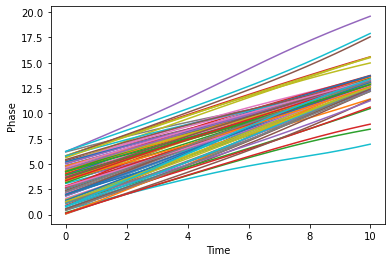

In [6]:
# Plot the results

for i in range(N):
    plt.plot(t, theta[:, i])
plt.xlabel('Time')
plt.ylabel('Phase')
plt.show()